- Họ và tên: Phan Quốc Lưu
- MSSV: 20133065


In [128]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import plotly.express as px
import pandas as pd
import plotly.graph_objs as go

# Phần I: Bài tập tại lớp

Bài 01: Vẽ biểu đồ điểm hai chiều dạng tĩnh thể hiện các điểm dữ liệu theo 𝑥 và 𝑦.

In [129]:
def generate_data(m):
    X = np.random.normal(50, 50, (m, 1))
    err = np.random.uniform(10, 50, (m, 1))
    Y = 1.5 * X + 20 + err
    return X, Y, err

In [130]:
X, Y, err = generate_data(50)


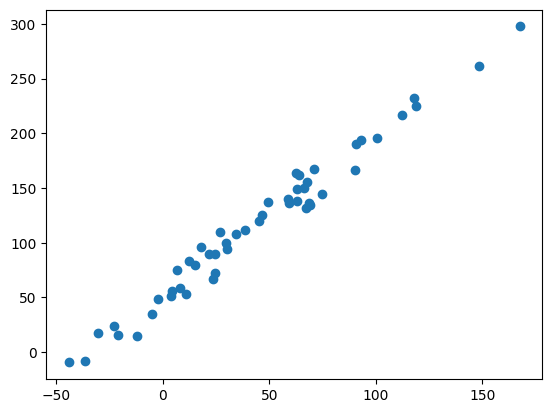

In [131]:
plt.scatter(X, Y)

Bài 02: Chỉ bằng Numpy, tính hệ số 𝛽 của hàm xác định đường xu hướng tuyến tính có giá trị chắn. Vẽ đường xu hướng trên biểu đồ bài 1. 

In [132]:
def get_beta(X, Y):
    return np.linalg.inv(X.T @ X) @ X.T @ Y

m = len(X)
X_with_one = X * np.ones((m, 2))
X_with_one[:, 0] = 1
beta = get_beta(X_with_one, Y)
gamma = beta[0].reshape(1, 1)
beta = beta[1].reshape(1, 1)
print(beta)
print(gamma)

[[1.4572298]]
[[52.0482825]]


In [133]:
model = linear_model.LinearRegression()
model.fit(X, Y)
print(model.coef_)
print(model.intercept_)

[[1.4572298]]
[52.0482825]


In [134]:
def linear_reg(X, beta, gamma):
    return X @ beta + gamma

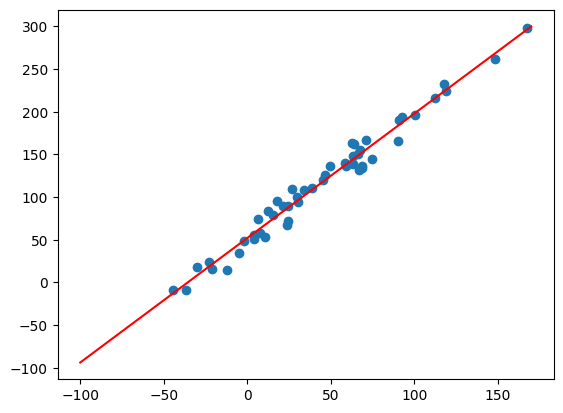

In [135]:
plt.scatter(X, Y)

start_y = linear_reg(np.array([[-100]]), beta, gamma)
end_y = linear_reg(np.array([[170]]), beta, gamma)

plt.plot([-100, 170], [start_y[0][0], end_y[0][0]], color='red')

Bài 03: Vẽ các đường mục tiêu vào biểu đồ đã vẽ ở bài trước.

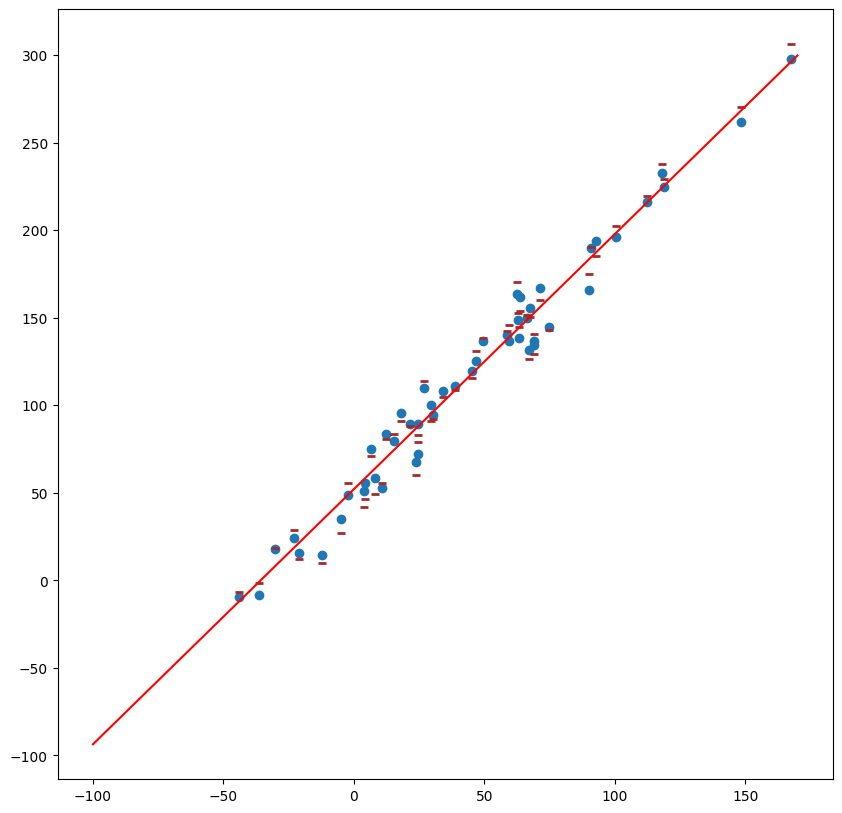

In [136]:
Z = [np.random.uniform(y[0] - 10, y[0] + 10) for y in Y]
Z = np.array(Z).reshape(-1, 1)

fig = plt.figure(figsize=(10, 10))
fig.add_subplot()
plt.scatter(X, Y)

start_y = linear_reg(np.array([[-100]]), beta, gamma)
end_y = linear_reg(np.array([[170]]), beta, gamma)

plt.plot([-100, 170], [start_y[0][0], end_y[0][0]], color='red')

#-------------

plt.scatter(X, Z, marker='_', linewidths=2, color='brown')

# Phần II: Bài tập về nhà

Bài 04: Vẽ lại biểu đồ bài 3 dạng động bằng Plotly có tích hợp chú giải công cụ tại các điểm dữ liệu. 

In [137]:
import numpy as np
import plotly.graph_objs as go

# Tạo dữ liệu
Z = [np.random.uniform(y[0] - 10, y[0] + 10) for y in Y]
Z = np.array(Z).reshape(-1, 1)

# Tạo trace cho điểm dữ liệu Y
trace1 = go.Scatter(
    x=X.flatten(),
    y=Y.flatten(),
    mode='markers',
    name='Y',
    marker=dict(
        color='blue',
        size=10,
        line=dict(
            color='black',
            width=1
        )
    ),
    showlegend=True,
    hovertemplate='Y: %{y:.2f}<extra></extra>'
)

# Tạo trace cho đường thẳng hồi quy tuyến tính
start_y = linear_reg(np.array([[-100]]), beta, gamma)
end_y = linear_reg(np.array([[170]]), beta, gamma)
trace2 = go.Scatter(
    x=[-100, 170],
    y=[start_y[0][0], end_y[0][0]],
    mode='lines',
    name='Linear Regression Line',
    line=dict(
        color='red',
        width=3
    ),
    showlegend=True,
    hovertemplate='Duong hoi quy: %{y:.2f}<extra></extra>'
)

# Tạo trace cho điểm dữ liệu Z
trace3 = go.Scatter(
    x=X.flatten(),
    y=Z.flatten(),
    mode='markers',
    name='Z',
    marker=dict(
        color='brown',
        size=10,
        symbol='line-ns',
        line=dict(
            color='black',
            width=1
        )
    ),
    showlegend=True,
    hovertemplate='Z: %{y:.2f}<extra></extra>'
)

# Tạo layout và thêm các trace vào đó
layout = go.Layout(
    title='Biểu đồ dạng động với chú giải công cụ tại các điểm dữ liệu',
    xaxis=dict(title='X'),
    yaxis=dict(title='Y/Z'),
    hovermode='closest'
)

fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
fig.show()


Bài 05:  Chỉ bằng Numpy, tính Shannon entropy của 𝑥.

In [138]:
# hàm tính Shannon entropy
def shannon_entropy(x):
    # Đếm số lần xuất hiện của mỗi giá trị trong vector x
    unique, counts = np.unique(x, return_counts=True)
    # Tính tổng số lượng dữ liệu
    total_count = len(x)
    # Tính hàm phân phối xác suất
    probs = counts / total_count
    # Tính Shannon entropy
    entropy = - np.sum(probs * np.log2(probs))
    return entropy
    # print('Shannon entropy of x:', entropy)

In [139]:
X = shannon_entropy(X)
print('Shannon entropy X la :', X)

Shannon entropy X la : 5.643856189774725
